In [5]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset, MFDataset, num2date
from matplotlib import pyplot as plt
import scipy as sc
from scipy import stats
%matplotlib inline
#import seaborn as sns
#Make it so you can see all the columns when you print a table
pd.options.display.max_columns = 400
pd.options.display.max_rows = 40
from scipy import stats
import cmocean
from cmocean import cm as cmo
import sys
import os
from matplotlib import rcParams
from matplotlib import gridspec
from brokenaxes import brokenaxes
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import cartopy as cart
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.patches as patches
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import geopy.distance
plt.style.use('classic')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import seaborn as sns

# Set plot style
sns.set_style("ticks")
sns.set_palette("colorblind", color_codes=True)
sns.set_context("poster")


In [76]:
#Load the file with the coordinates of stations
data = pd.read_csv('/Users/daniosro/OneDrive - California ' 
             'Institute of Technology/1. Adkins/SR2113' 
             '/SR2113_Coordinates.csv')
#data = pd.read_excel(
#    '/Users/FrankieMacbook/Documents/Grad School/Th_Pa documents/UltraPac/Frankie_GP16_SO245_HeData_Final.xlsx', 
#    sheet_name = 'Finalized_LampUpdate',skiprows=[1,2])
#This line downloads the bathymetry data from a server  
ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.WORLDBATH/bath/dods')
os.environ["CARTOPY_USER_BACKGROUNDS"] ='/Users/daniosro/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/1. Adkins/SR2113/'

In [8]:
data.head()

,Cruise,Station,Date,Longitude_degrees_east,Latitude_degrees_north,Depth_m,Dummy1,Dummy2
0,SR2113,SCB 01,11/21/21,-118.175100,32.655100,0.0,0,0
1,SR2113,CR 02,12/7/21,-87.957350,5.959633,2632.8,0,0
2,SR2113,CR 03,12/11/21,-86.593267,5.169650,1619.3,0,0
3,SR2113,CR 04.5,12/16/21,-86.854783,5.377767,1857.0,0,0


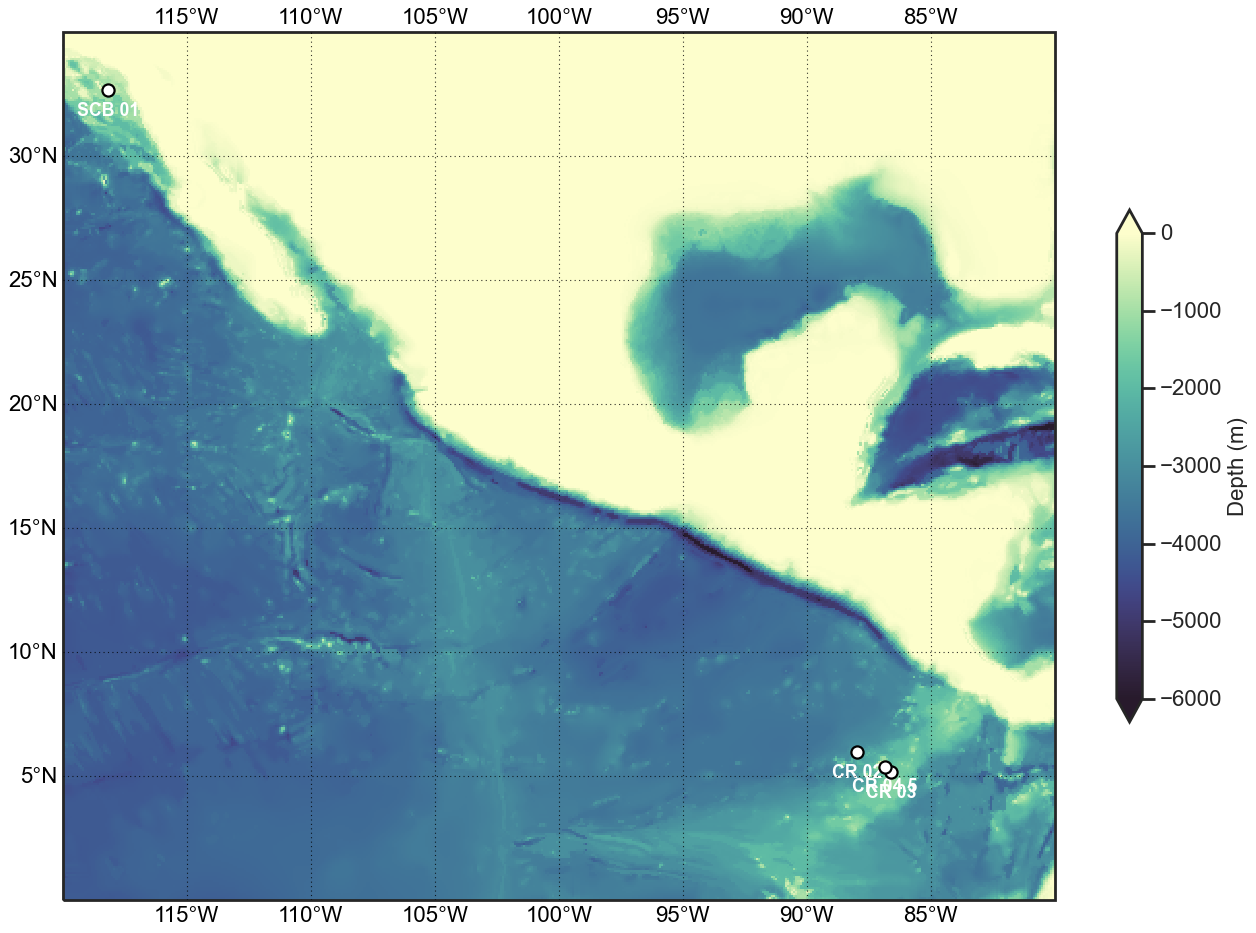

In [30]:
#Plot the map
#Create figure
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
plt.pcolormesh(ds['X'], ds['Y'], ds['bath'],
            transform=ccrs.PlateCarree(), vmin=-6000, vmax=0,
             cmap=cmocean.cm.deep_r)
cbar = plt.colorbar(orientation='vertical', shrink=0.4, extend='both')
cbar.ax.set_ylabel('Depth (m)', fontweight = 500, fontsize = 20, rotation=90)
cbar.ax.tick_params(labelsize = 20)
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
#Plot the labels of the stations next to the markers in the map
for label, xpt, ypt in zip(data.Station,
                           data.Longitude_degrees_east,
                           data.Latitude_degrees_north):
    plt.text(xpt, ypt-1, label, size=16,horizontalalignment='center', color='white', fontweight='bold',
             transform=ccrs.PlateCarree())
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([240, 280, 0, 35], crs=ccrs.PlateCarree())
g1.right_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':20}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':20}
# Save figure
#plt.savefig('SR2113_map.jpg', bbox_inches='tight')

In [ ]:
#Plot the map
#Create figure
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
plt.pcolormesh(ds['bath'], vmin=-2000, vmax=0,
             cmap=cmocean.cm.deep_r)
cbar = plt.colorbar(orientation='vertical', shrink=0.4, extend='both')

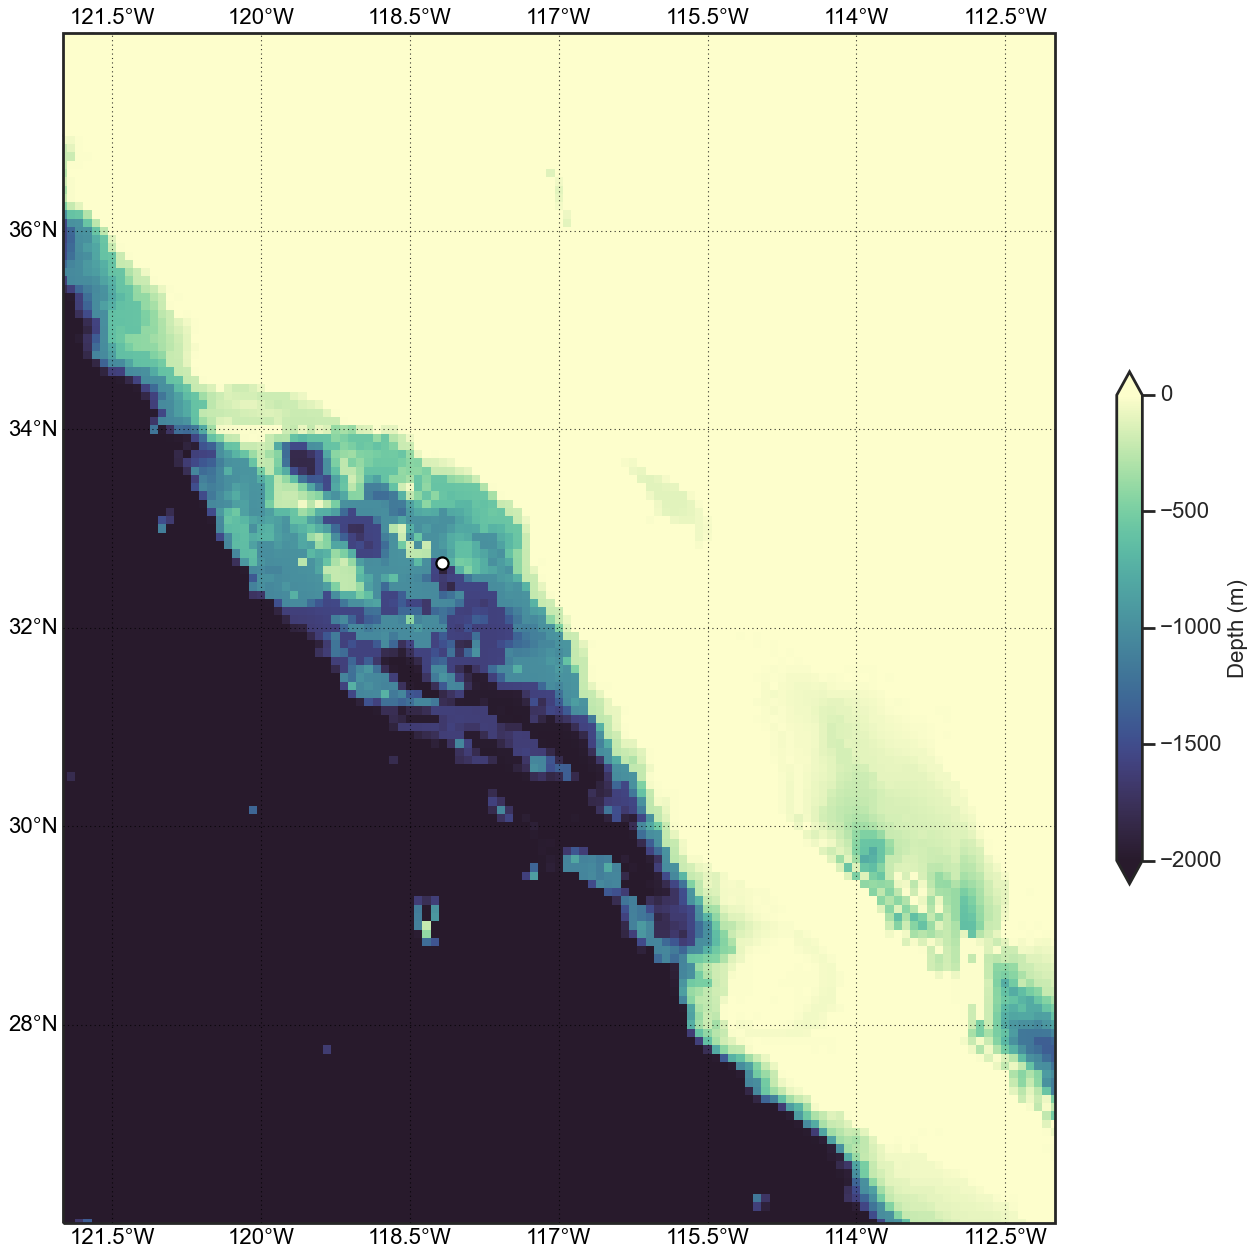

In [89]:
#Plot the map
#Create figure
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
#ax.background_img(name='ETOPO_SCB', resolution='high')
plt.pcolormesh(ds['X'], ds['Y'], ds['bath'],
            transform=ccrs.PlateCarree(), vmin=-2000, vmax=0,
             cmap=cmocean.cm.deep_r)
cbar = plt.colorbar(orientation='vertical', shrink=0.4, extend='both')
cbar.ax.set_ylabel('Depth (m)', fontweight = 500, fontsize = 20, rotation=90)
cbar.ax.tick_params(labelsize = 20)
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([238, 248, 26, 38], crs=ccrs.PlateCarree())
g1.right_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':20}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':20}
# Save figure
#fig.savefig('SR2113_map_inset1.pdf', bbox_inches='tight')

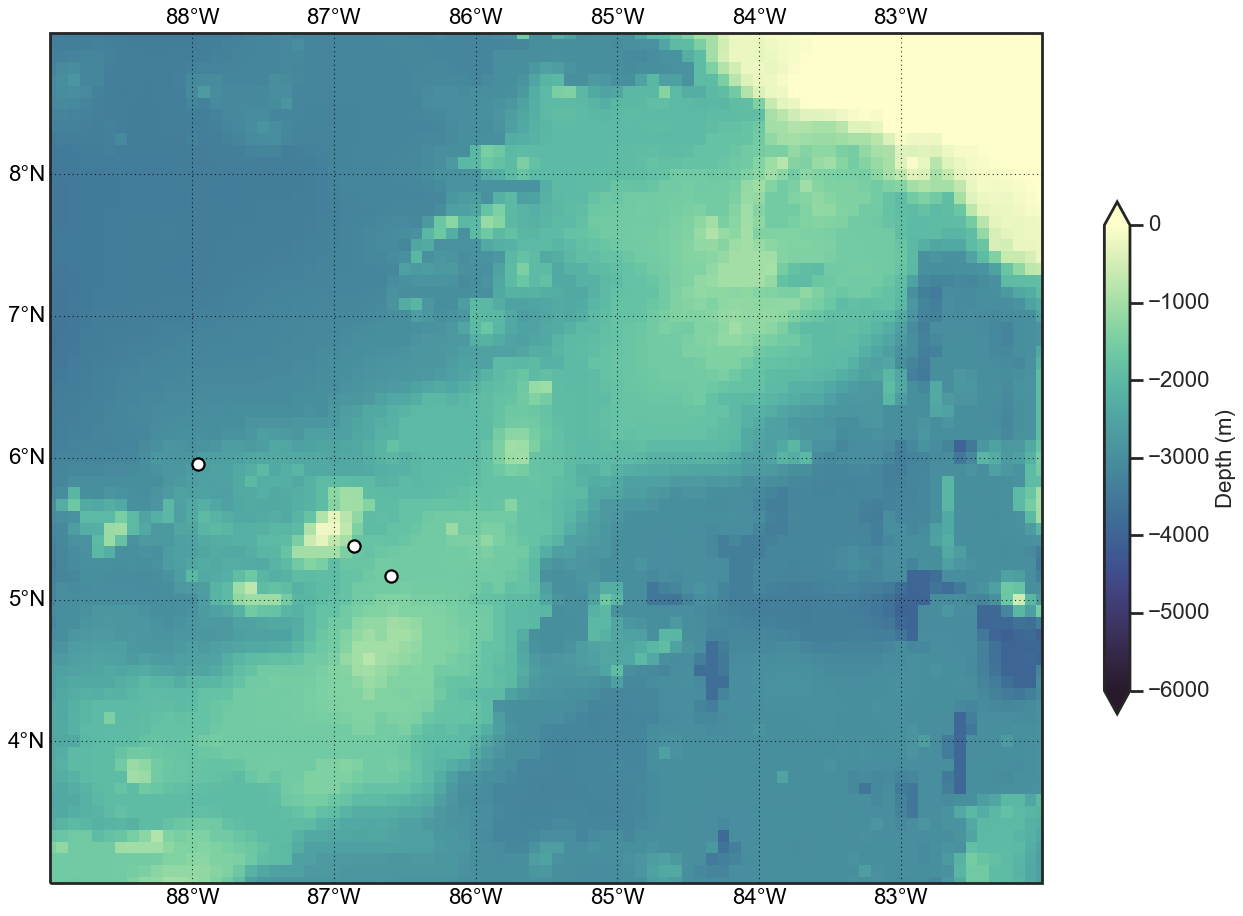

In [6]:
#Plot the map
#Create figure
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
plt.pcolormesh(ds['X'], ds['Y'], ds['bath'],
            transform=ccrs.PlateCarree(), vmin=-6000, vmax=0,
             cmap=cmocean.cm.deep_r)
cbar = plt.colorbar(orientation='vertical', shrink=0.4, extend='both')
cbar.ax.set_ylabel('Depth (m)', fontweight = 500, fontsize = 20, rotation=90)
cbar.ax.tick_params(labelsize = 20)
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([271, 278, 3, 9], crs=ccrs.PlateCarree())
g1.right_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':20}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':20}
# Save figure
plt.savefig('SR2113_map_inset2.jpg', bbox_inches='tight')

## Make higher resolution maps

In [50]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc4

# projection of data (lat/lon)
data_proj = ccrs.PlateCarree()
# target projection, let's make a stereographic over Southern Ocean
proj = ccrs.SouthPolarStereo(central_longitude=0)
# run this in your terminal to get a topography file quickly
# cdo -f nc topo,r720x360 topo.nc
# loading NetCDF file
fnm = '/Users/daniosro/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/1. Adkins/SR2113/topo_r720x360.nc'
nc = nc4.Dataset(fnm,'r')
topo = nc.variables["topo"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

# the 360 degree line is missing, let's make it cyclic
topo, lon = add_cyclic_point(topo, coord=lon)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.boo

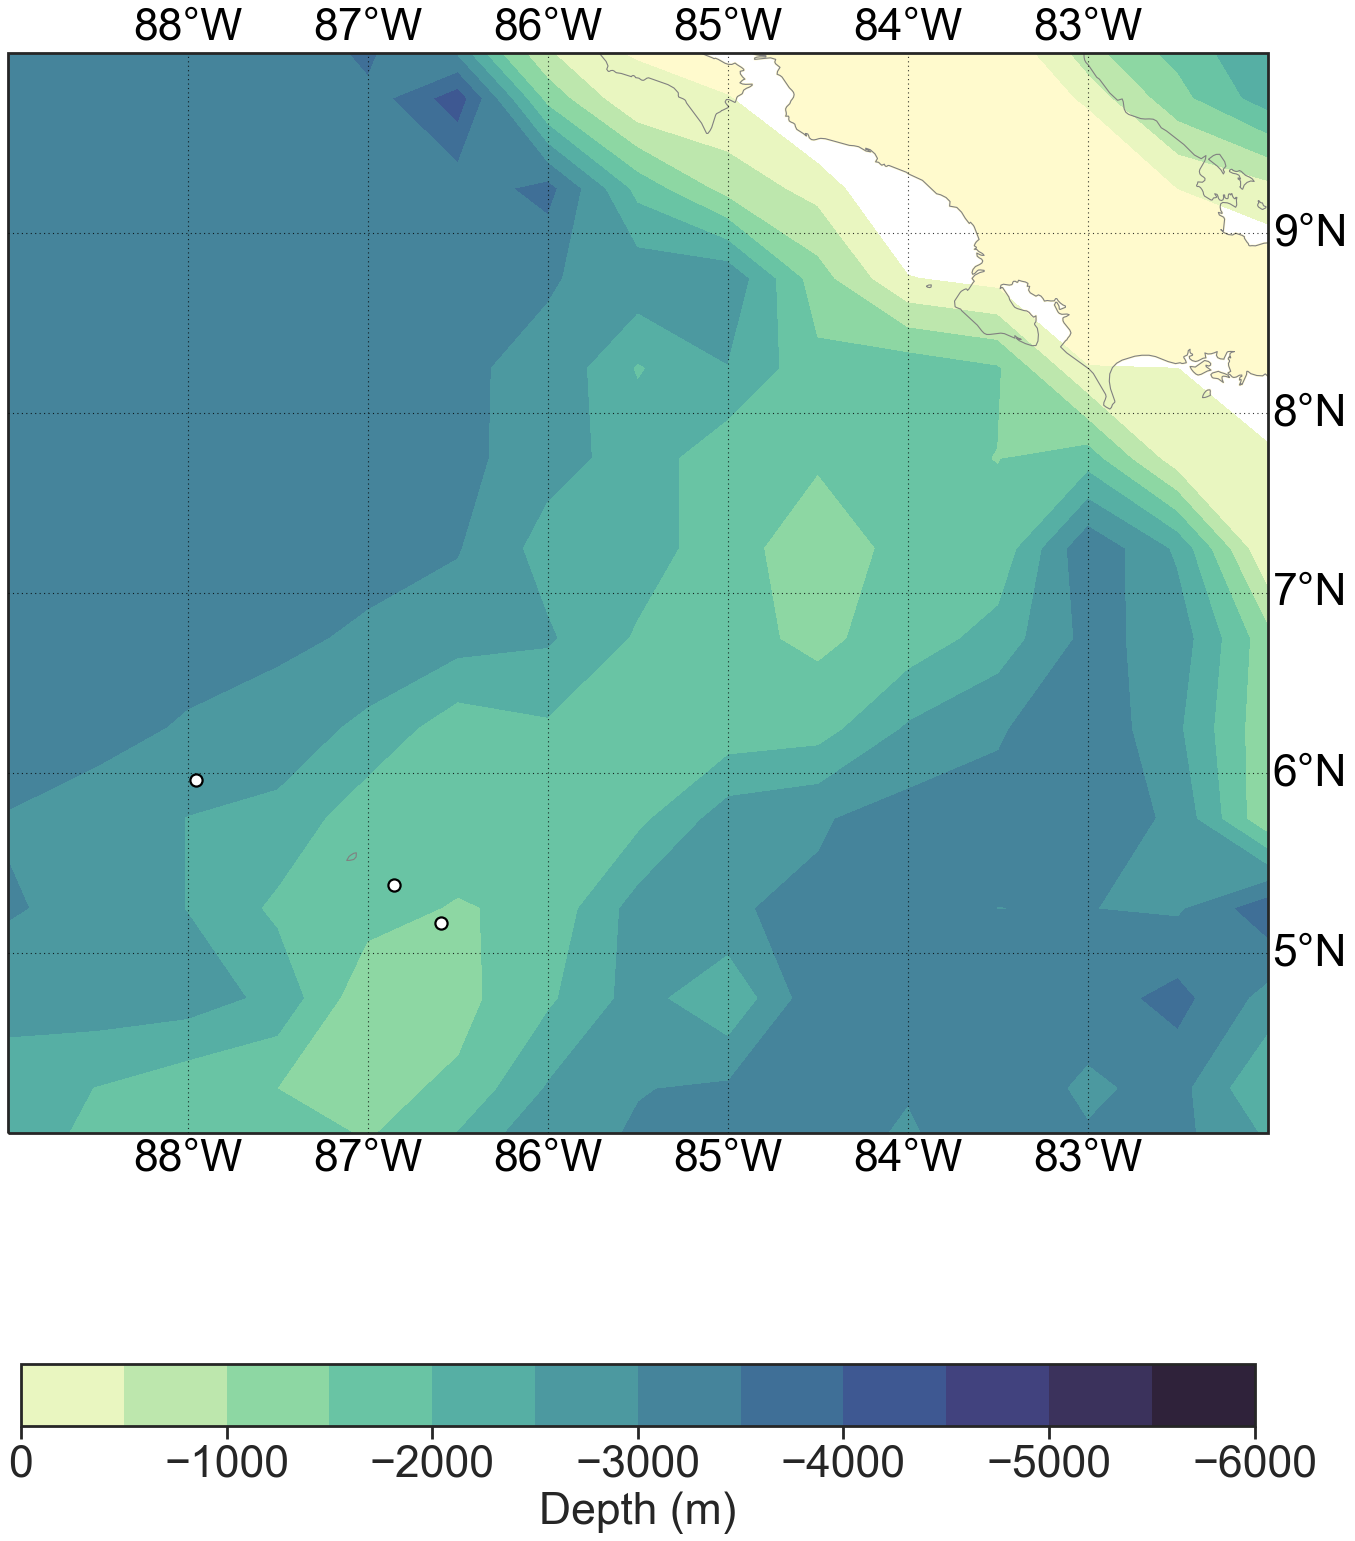

In [88]:
#Make Cocos Ridge inset
# create figure and axis object with projection axis
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
# make colour contours with colorbar
im = ax.contourf(lon,lat,topo,levels=range(-6000,1,500),cmap=cmocean.cm.deep_r,transform=data_proj)
cbar = plt.colorbar(im,ax=ax,shrink=0.8, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize = 40)
cbar.set_label(label="Depth (m)",size=40)
cbar.ax.invert_xaxis()
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
# make contour lines
ax.contour(lon,lat,topo,levels=range(-6000,1,500),linewidths=0,alpha=0.5,colors="k",linestyles='-',transform=data_proj)
# add land masses
ax.add_feature(cfeature.LAND,color="lemonchiffon")
# and some coast lines
ax.coastlines(lw=1,color="grey")
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([271, 278, 4, 10], crs=data_proj)
g1.left_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':40}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':40}
plt.tight_layout()
fig.savefig("/Users/daniosro/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/1. Adkins/SR2113/SR2113_map_inset2.pdf", bbox_inches='tight')
plt.show()

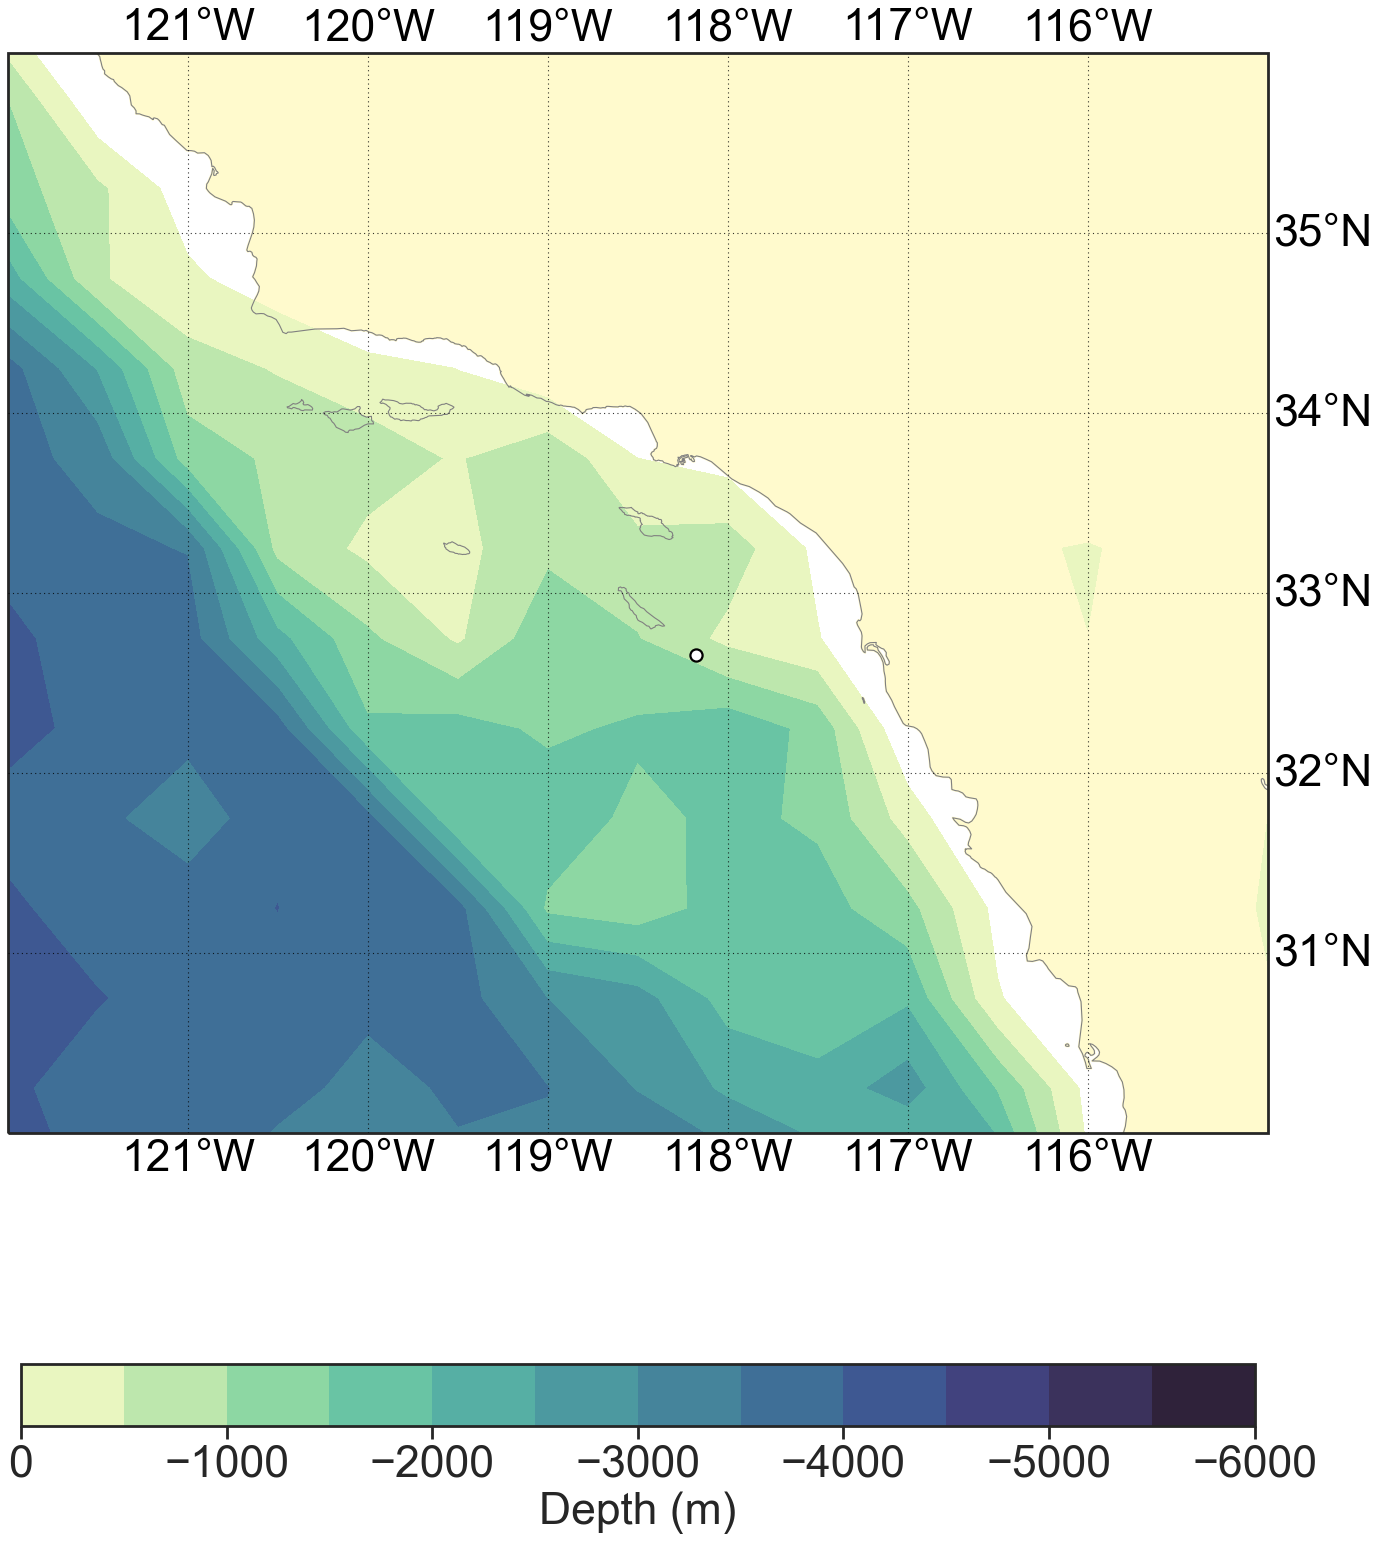

In [93]:
#Make SCB inset
# create figure and axis object with projection axis
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
# make colour contours with colorbar
im = ax.contourf(lon,lat,topo,levels=range(-6000,1,500),cmap=cmocean.cm.deep_r,transform=data_proj)
cbar = plt.colorbar(im,ax=ax,shrink=0.8, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize = 40)
cbar.set_label(label="Depth (m)",size=40)
cbar.ax.invert_xaxis()
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
# make contour lines
ax.contour(lon,lat,topo,levels=range(-6000,1,500),linewidths=0,alpha=0.5,colors="k",linestyles='-',transform=data_proj)
# add land masses
ax.add_feature(cfeature.LAND,color="lemonchiffon")
# and some coast lines
ax.coastlines(lw=1,color="grey")
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([238, 245, 30, 36], crs=data_proj)
g1.left_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':40}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':40}
plt.tight_layout()
fig.savefig("/Users/daniosro/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/1. Adkins/SR2113/SR2113_map_inset1.pdf", bbox_inches='tight')
plt.show()

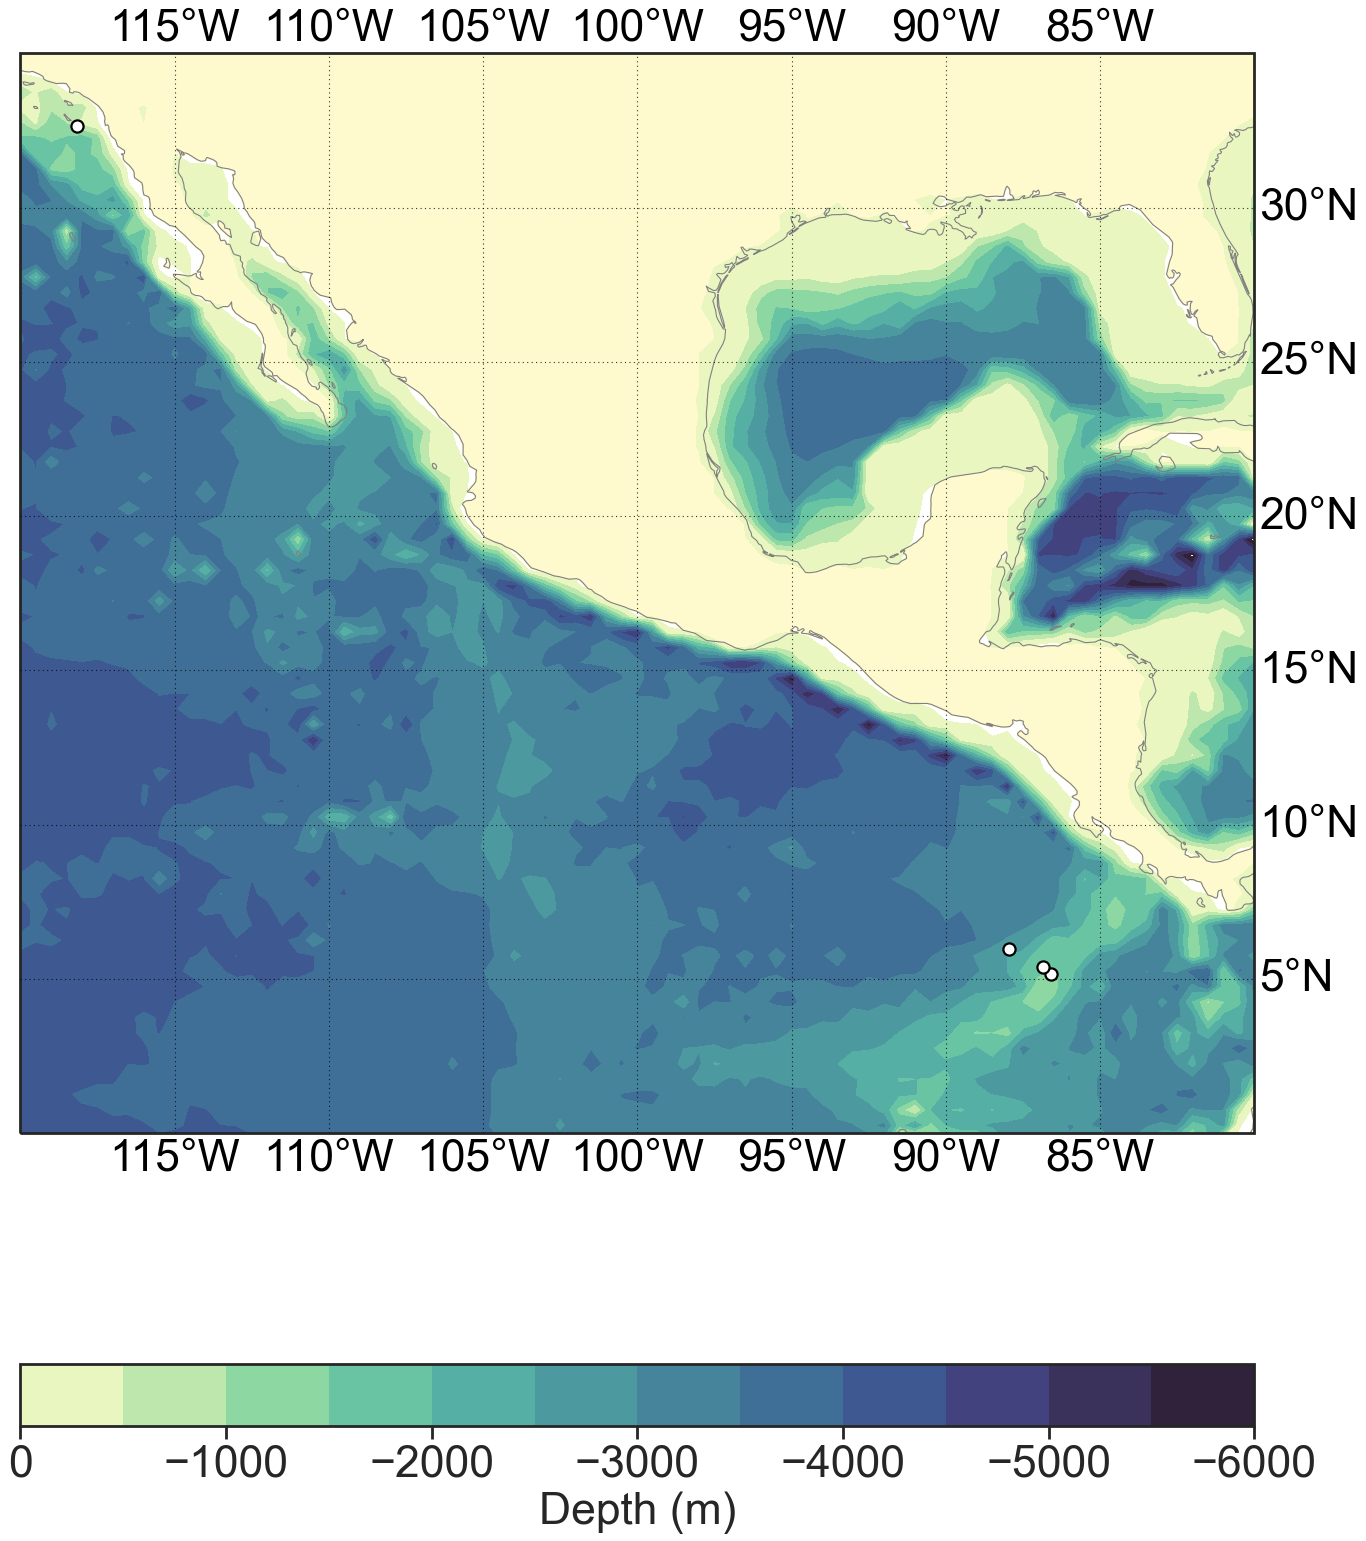

In [91]:
#Make big map
# create figure and axis object with projection axis
fig = plt.figure(figsize = (20,20), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
# make colour contours with colorbar
im = ax.contourf(lon,lat,topo,levels=range(-6000,1,500),cmap=cmocean.cm.deep_r,transform=data_proj)
cbar = plt.colorbar(im,ax=ax,shrink=0.8, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize = 40)
cbar.set_label(label="Depth (m)",size=40)
cbar.ax.invert_xaxis()
#Plot the station markers
plt.scatter(data.query('Cruise=="SR2113"')['Longitude_degrees_east'], data.query('Cruise=="SR2113"')['Latitude_degrees_north'], s=120, marker='o', transform=ccrs.PlateCarree(), zorder=5, 
           edgecolor='black', facecolor='white')
# make contour lines
ax.contour(lon,lat,topo,levels=range(-6000,1,500),linewidths=0,alpha=0.5,colors="k",linestyles='-',transform=data_proj)
# add land masses
ax.add_feature(cfeature.LAND,color="lemonchiffon")
# and some coast lines
ax.coastlines(lw=1,color="grey")
#Define axes labels and style
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='black', alpha=0.8, linestyle=':', zorder=3)
#Define the limits of the map using the SR2113 coordinates
ax.set_extent([240, 280, 0, 35], crs=data_proj)
g1.left_labels = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'color': 'black', 'weight': 500, 'size':40}
g1.ylabel_style = {'color': 'black', 'weight': 500, 'size':40}
plt.tight_layout()
fig.savefig("/Users/daniosro/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/1. Adkins/SR2113/SR2113_map.pdf", bbox_inches='tight')
plt.show()